In [118]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv('50_Startups.csv')

In [120]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [121]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

In [122]:
encodedCol = ohe.fit_transform(df[['State']]).toarray()
encodedDf = pd.DataFrame(encodedCol, columns= ohe.get_feature_names_out(['State']))
encodedDf.head()

,State_Florida,State_New York
0,0.0,1.0
1,0.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [123]:
df.drop(columns=['State'], inplace= True)

In [124]:
df = pd.concat([df,encodedDf], axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,1.0,0.0


C:\Users\abhinav.aggarwal\AppData\Local\Temp\ipykernel_9604\3064701292.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['R&D Spend'])
C:\Users\abhinav.aggarwal\AppData\Local\Temp\ipykernel_9604\3064701292.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Administration'])


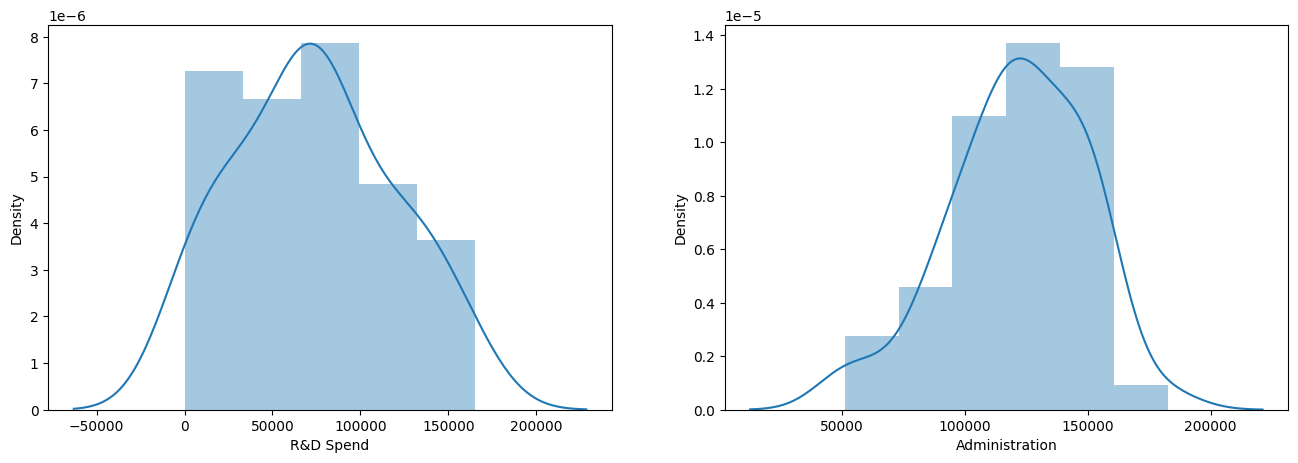

In [125]:
import seaborn as sns
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['R&D Spend'])
plt.subplot(1,2,2)
sns.distplot(df['Administration'])

plt.show()
## distplot is a function of sns used to make the distribution plot of values
# Here CGPA is of normal distribution and placement exam marks is skewed distribution

C:\Users\abhinav.aggarwal\AppData\Local\Temp\ipykernel_9604\2742169226.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Marketing Spend'])
C:\Users\abhinav.aggarwal\AppData\Local\Temp\ipykernel_9604\2742169226.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['State_Florida'])


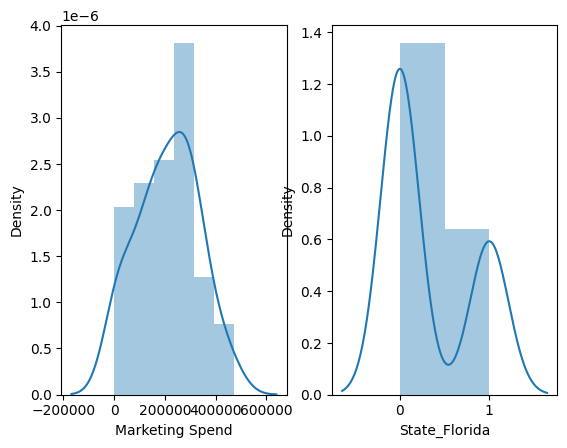

In [126]:
plt.subplot(1,2,1)
sns.distplot(df['Marketing Spend'])
plt.subplot(1,2,2)
sns.distplot(df['State_Florida'])
#plt.subplot(1,2,5)
#sns.distplot(df['State_New York'])

plt.show()

In [127]:
## Now calculating the z-score using formula
x = df['R&D Spend']
#x2 = df['R&D Spend']
df['R&D Spend_ZScore'] = (x - x.mean())/x.std()

In [128]:
df[(df['R&D Spend_ZScore'] > 3) | (df['R&D Spend_ZScore'] < -3)]
## No outliers

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York,R&D Spend_ZScore


In [129]:
df.drop(columns=['R&D Spend_ZScore'], inplace = True)

In [130]:
x = df.iloc[:,[0,1,2,4,5]]
y = df.iloc[:,3]

In [135]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,1.0,0.0


In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [133]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [138]:
y_pred = regressor.predict(x_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error

In [140]:
print("The Mean absolute error is: ", mean_absolute_error(y_test, y_pred))
print("The Mean squared error is: ", mean_squared_error(y_test, y_pred))
print("The Root Mean squared error is: ", root_mean_squared_error(y_test, y_pred))
print("The R2 score is: ", r2_score(y_test, y_pred))

The Mean absolute error is:  7514.293659640612
The Mean squared error is:  83502864.03257759
The Root Mean squared error is:  9137.990152794957
The R2 score is:  0.9347068473282423
